<a href="https://colab.research.google.com/github/varsha2509/Springboard-DS/blob/master/Capstone2/Colab/DeepSat6_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform EDA of DeepSat 6 dataset

In [ ]:
#Install Packages and Mount Google Drive
import pandas as pd
import numpy as np
import cv2
import h5py
import csv
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from google.colab import drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Springboard/Capstone Projects/Capstone-2/DeepSat-6-Dataset/"

#Mount the drive to colab notebook
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Change the current working directory
%cd /content/gdrive/My\ Drive/Springboard/Capstone\ Projects/Capstone-2/DeepSat-6-Dataset/


/content/gdrive/My Drive/Springboard/Capstone Projects/Capstone-2/DeepSat-6-Dataset


In [ ]:
## Load the .mat file to data
data=loadmat('/content/gdrive/My Drive/Springboard/Capstone Projects/Capstone-2/DeepSat-6-Dataset/sat-6-full.mat')

**Performing Exploratory Data Analysis to understand the type of dataset, shape and content.**

In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_x', 'test_x', 'train_y', 'test_y', 'annotations'])

In [ ]:
#Print the shape of 'train_x'
data['train_x'].shape
## 'train_x' contains 324,000 28x28 image pixels with 4 channels

(28, 28, 4, 324000)

In [ ]:
#Print the shape of 'test_x'
data['test_x'].shape
## 'test_x' contains 81,000 28x28 image pixels with 4 channels

(28, 28, 4, 81000)

In [ ]:
#Print the shape of 'train_y'
data['train_y'].shape
## 'train_y' is a 6x1 vector label for 324,000 images

(6, 324000)

In [ ]:
#Print the shape of 'test_y'
data['test_y'].shape
## 'test_y' is a 6x1 vector label for 81,000 images

(6, 81000)

In [ ]:
## Move the last column which contains the 'number' of images to the first column
print(len(data['train_x'][1]))

28


In [ ]:
## Explore the different annotations in the data
print(data['annotations'])

[[array(['100000'], dtype='<U6') array(['building'], dtype='<U8')]
 [array(['010000'], dtype='<U6') array(['barren land'], dtype='<U11')]
 [array(['001000'], dtype='<U6') array(['trees'], dtype='<U5')]
 [array(['000100'], dtype='<U6') array(['grassland'], dtype='<U9')]
 [array(['000010'], dtype='<U6') array(['road'], dtype='<U4')]
 [array(['000001'], dtype='<U6') array(['water'], dtype='<U5')]]


In [ ]:
## Create individual nparrays for train and test from mat
Xtrain = data['train_x'].reshape(-1, 28, 28, 4) #This moves the position of the last column to the first, and clips the RGB values between (0,255)
ytrain = data['train_y'].T #Transposes the y_train array to be of size (324,000,6)
Xtest = data['test_x'].reshape(-1, 28,28,4) #Same as Xtrain
ytest = data['test_y'].T #Same as ytrain

In [ ]:
Xtrain = np.moveaxis(data['train_x'], -1, 0)

In [ ]:
Xtrain[1]

array([[[177, 152, 129, 183],
        [180, 154, 128, 182],
        [181, 156, 129, 180],
        ...,
        [184, 164, 133, 177],
        [185, 164, 140, 179],
        [192, 172, 135, 179]],

       [[176, 152, 127, 184],
        [181, 155, 132, 183],
        [178, 152, 131, 182],
        ...,
        [181, 165, 137, 181],
        [185, 167, 141, 180],
        [194, 173, 147, 180]],

       [[178, 156, 130, 186],
        [185, 157, 131, 184],
        [185, 158, 131, 183],
        ...,
        [184, 162, 136, 181],
        [190, 170, 145, 182],
        [196, 177, 145, 181]],

       ...,

       [[184, 168, 143, 178],
        [192, 170, 145, 176],
        [196, 171, 143, 174],
        ...,
        [183, 166, 139, 178],
        [180, 165, 134, 178],
        [176, 158, 134, 174]],

       [[186, 164, 137, 174],
        [188, 166, 135, 173],
        [190, 169, 139, 174],
        ...,
        [178, 161, 135, 173],
        [182, 161, 136, 173],
        [180, 162, 137, 173]],

       [[182

In [ ]:
#Load the annotations as individual array
annotations = data['annotations']
annotations

array([[array(['100000'], dtype='<U6'), array(['building'], dtype='<U8')],
       [array(['010000'], dtype='<U6'),
        array(['barren land'], dtype='<U11')],
       [array(['001000'], dtype='<U6'), array(['trees'], dtype='<U5')],
       [array(['000100'], dtype='<U6'),
        array(['grassland'], dtype='<U9')],
       [array(['000010'], dtype='<U6'), array(['road'], dtype='<U4')],
       [array(['000001'], dtype='<U6'), array(['water'], dtype='<U5')]],
      dtype=object)

In [ ]:
#Create a dictionary with values as land categories
land_categories = dict()
for an in range(len(annotations)):
  land_categories[an] = annotations[an][1][0]
land_categories

{0: 'building',
 1: 'barren land',
 2: 'trees',
 3: 'grassland',
 4: 'road',
 5: 'water'}

In [ ]:
#Map ytrain and ytest with label names
ytrain_cat = pd.DataFrame(ytrain).idxmax(axis=1).map(land_categories)
ytest_cat = pd.DataFrame(ytest).idxmax(axis=1).map(land_categories)

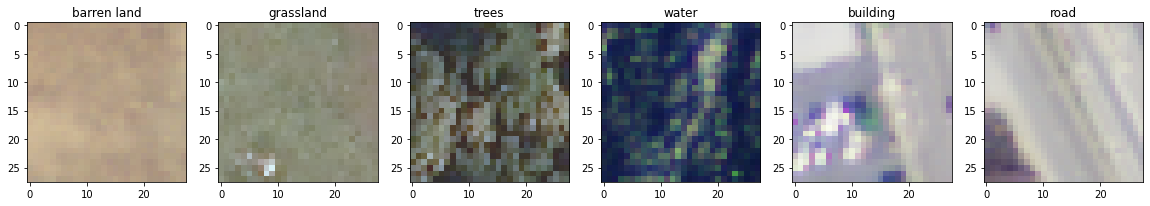

In [ ]:
#Plot some sample figures for exploration
fig,ax =plt.subplots(1,6,figsize=(20,10))
ax[0].imshow(Xtrain[1,:,:,:3], cmap='gray', vmin = 0, vmax = 255)
ax[1].imshow(Xtrain[29,:,:,:3])
ax[2].imshow(Xtrain[53,:,:,:3])
ax[3].imshow(Xtrain[7,:,:,:3])
ax[4].imshow(Xtrain[81,:,:,:3])
ax[5].imshow(Xtrain[258,:,:,:3])
ax[0].set_title(ytrain_cat[1])
ax[1].set_title(ytrain_cat[29])
ax[2].set_title(ytrain_cat[53])
ax[3].set_title(ytrain_cat[287])
ax[4].set_title(ytrain_cat[81])
ax[5].set_title(ytrain_cat[131]);

Text(0.5, 1.0, 'Categories in test set')

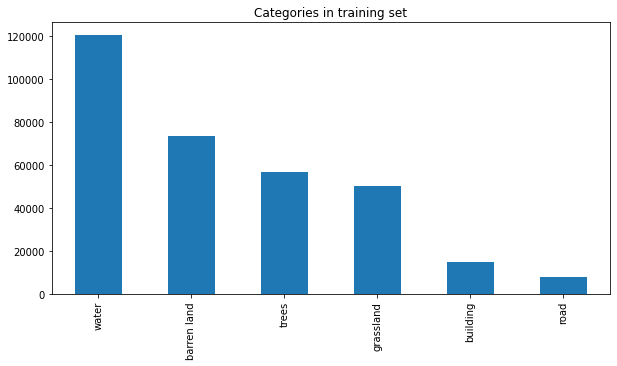

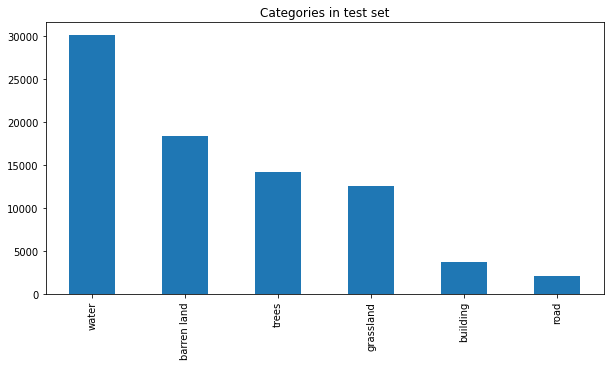

In [ ]:
#Count number of images in each category in test and train dataset
fig,ax = plt.subplots(figsize = (10,5))
ax = ytrain_cat.value_counts().plot.bar()
ax.set_title('Categories in training set')


fig,ax1 = plt.subplots(figsize = (10,5))
ax1 = ytest_cat.value_counts().plot.bar()
ax1.set_title('Categories in test set')


# Exploring RGB values of different images

## Average of Images by ClassType

In [ ]:
## Determining Average RGB by Classtype


#Convert the pandas series of ytrain to dataframe
ytrain_cat_df = ytrain_cat.to_frame()
ytrain_cat_df.rename(columns = {0:'Category'}, inplace=True)

#Define a function to determine average RGB value of all images by classtype
def avg_img_by_classtype(name):
  """
  Name can be of class water, buildings, road, barren land, trees, grassland
  """
  
  #First grab all the index that belong to a class type and create a dataframe with index numbers as 'class_df'
  class_df = ytrain_cat_df.loc[ytrain_cat_df['Category'] == name]
  class_df.reset_index(inplace=True)


  #Next, append the RGB values of images belonging to those indices
  class_images = []
  for i in class_df['index'].head(7):
    class_images.append(Xtrain[i,:,:,:3])

  #Next, determine the average RGB value of all the images belonging to a class by pixel
  class_images_mean = np.average((class_images), axis=0)
  
  #class_images_mean_int =  (class_images_mean).astype(np.uint8)



  #Next, plot the average photo of each class type
  plt.imshow((class_images_mean).astype(np.uint8))
  plt.title(name, size = 16)
  plt.show
  






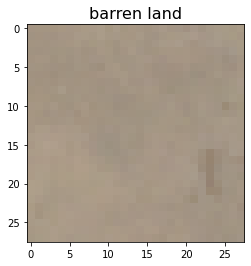

In [ ]:
## Barren Land
avg_img_by_classtype('barren land')

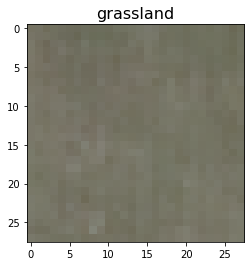

In [ ]:
## Grassland
avg_img_by_classtype('grassland')

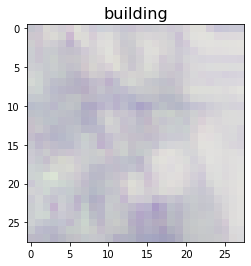

In [ ]:
## Building
avg_img_by_classtype('building')

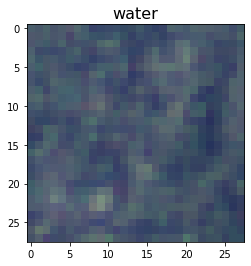

In [ ]:
## Water
avg_img_by_classtype('water')

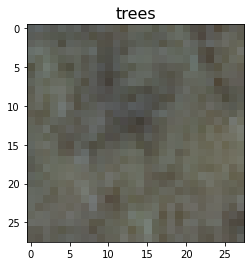

In [ ]:
## Tree
avg_img_by_classtype('trees')

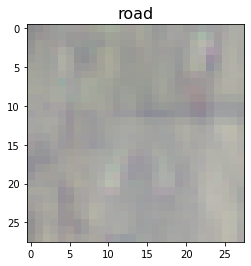

In [ ]:
## Road
avg_img_by_classtype('road')

## RGB Values by Class

In [ ]:
def getAverageRGBN(image):
  """
  Given PIL Image, return average value of color as (r, g, b)
  """
  # get image as numpy array
  im = np.array(image)
  # get shape
  w,h,d = im.shape
  # change shape
  im.reshape(w*h,d)
  # get average
  return tuple(np.average(im, axis=(0,1)).astype(np.uint8))

In [ ]:
barren_rgb = getAverageRGBN(Xtrain[1])
grass_rgb = getAverageRGBN(Xtrain[29])
trees_rgb = getAverageRGBN(Xtrain[53])
water_rgb = getAverageRGBN(Xtrain[7])
building_rgb = getAverageRGBN(Xtrain[81])
road_rgb = getAverageRGBN(Xtrain[258])

In [ ]:
## AVerage RGB by class
avg_rgb_class = pd.DataFrame(
    {'Barren land': barren_rgb,
     'Grassland': grass_rgb,
     'Trees': trees_rgb,
     'Water': water_rgb,
     'Building': building_rgb,
     'Road': road_rgb,
    })

In [ ]:
avg_rgb_class = avg_rgb_class.T
avg_rgb_class.columns = ['Red', 'Green', 'Blue', 'NIR']

In [ ]:
avg_rgb_class

,Red,Green,Blue,NIR
Barren land,183,162,136,179
Grassland,139,140,120,194
Trees,90,93,84,149
Water,45,60,85,9
Building,176,175,184,88
Road,182,179,178,94


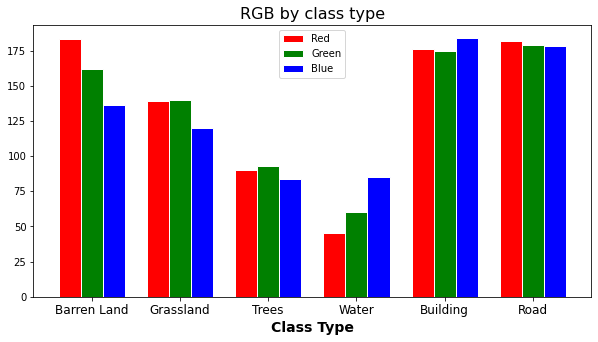

In [ ]:

#Figure size
plt.subplots(figsize = (10,5))
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, avg_rgb_class['Red'], color='red', width=barWidth, edgecolor='white', label='Red')
plt.bar(r2, avg_rgb_class['Green'], color='green', width=barWidth, edgecolor='white', label='Green')
plt.bar(r3, avg_rgb_class['Blue'], color='blue', width=barWidth, edgecolor='white', label='Blue')
 
# Add xticks on the middle of the group bars
plt.xlabel('Class Type', fontweight='bold', size = 14)
plt.xticks([r + barWidth for r in range(6)], ['Barren Land', 'Grassland', 'Trees', 'Water', 'Building', 'Road'], size = 12)
plt.title("RGB by class type", size = 16)

# Create legend & Show graphic
plt.legend()
plt.show()

## Grayscale (Lumens) by Class

In [ ]:
## Lumen for 
gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 

In [ ]:
barren_gray = gray(Xtrain[1]).mean()
grass_gray = gray(Xtrain[29]).mean()
trees_gray = gray(Xtrain[53]).mean()
water_gray = gray(Xtrain[7]).mean()
building_gray = gray(Xtrain[81]).mean()
road_gray = gray(Xtrain[258]).mean()

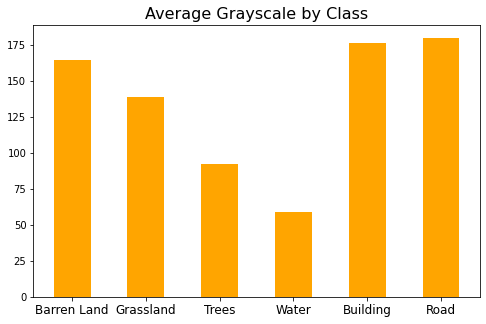

In [ ]:
## AVerage gray by class
avg_gray_class = [('Barren Land', barren_gray), ('Grassland', grass_gray), ('Trees', trees_gray), ('Water', water_gray), ('Building', building_gray), ('Road', road_gray)]


labels, ys = zip(*avg_gray_class)
xs = np.arange(len(labels)) 
width = 0.5

plt.subplots(figsize = (8,5))

plt.bar(xs, ys, width, align='center', color='orange')
plt.title('Average Grayscale by Class', size = 16)
plt.xticks(xs, labels, size = 12) #Replace default x-ticks with xs, then replace xs with labels
plt.show()

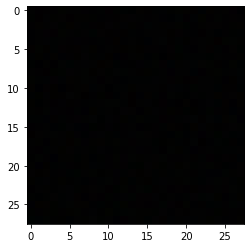

In [ ]:
# Determining Average RGB by Classtype


#Convert the pandas series of ytrain to dataframe
ytrain_cat_df = ytrain_cat.to_frame()
ytrain_cat_df.rename(columns = {0:'Category'}, inplace=True)

#Define a function to determine average RGB value of all images by classtype
def avg_img_by_classtype(name):
  """
  Name can be of class water, buildings, road, barren land, trees, grassland
  """
  
  #First grab all the index that belong to a class type and create a dataframe with index numbers as 'class_df'
  class_df = ytrain_cat_df.loc[ytrain_cat_df['Category'] == name]
  class_df.reset_index(inplace=True)


  #Next, append the RGB values of images belonging to those indices
  class_r = []
  class_g = []
  class_b = []
  class_r_sum = np.zeros((28,28))
  class_g_sum = np.zeros((28,28))
  class_b_sum = np.zeros((28,28))
  numImages = 0
  for i in class_df['index'].head(5):
    class_r = np.dot(Xtrain[i,:,:,0], Xtrain[i,:,:,0])
    class_r_sum = class_r_sum + class_r
    
    class_g = np.dot(Xtrain[i,:,:,0], Xtrain[i,:,:,1])
    class_g_sum = class_g_sum + class_g
    
    class_b = np.dot(Xtrain[i,:,:,0], Xtrain[i,:,:,2])
    class_b_sum = class_b_sum + class_b
    numImages = numImages + 1
    
    class_r_sum = np.sqrt(class_r_sum)/numImages

    class_g_sum = np.sqrt(class_g_sum)/numImages

    class_b_sum = np.sqrt(class_b_sum)/numImages


    rgb_uint8 = (np.dstack((class_r_sum,class_g_sum,class_b_sum))).astype(np.uint8)  

  #Next, determine the average RGB value of all the images belonging to a class by pixel
  #class_images_mean = np.mean((class_images), axis=(0))
  #class_images_mean_int =  (class_images_mean*255).astype(np.uint8)/255



  #Next, plot the average photo of each class type
  plt.imshow(rgb_uint8, cmap = 'gray')
  #plt.title(name)
  



avg_img_by_classtype('road')




# water_r = []
# water_g = []
# water_b = []
# for i in water_df['index']:
#   water_r.append(Xtrain[i,:,:,0])
#   water_g.append(Xtrain[i,:,:,1])
#   water_b.append(Xtrain[i,:,:,2])

# water_r_mean = np.mean(water_r, axis = 0)
# water_g_mean = np.mean(water_g, axis = 0)
# water_b_mean = np.mean(water_b, axis = 0)





```
# This is formatted as code
```

### RGB for image classified as Water

In [ ]:
ytrain[100]
## This pixel is classified as "water"

array([0, 0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
### Get the RGB values of a sample image located at position 100. We'll plot the RGB value of a specific pixel
print('Value of only R channel {}'.format(Xtrain[100,10,10, 0]))
print('Value of only G channel {}'.format(Xtrain[ 100,10,10, 1]))
print('Value of only B channel {}'.format(Xtrain[ 100,10,10, 2]))

Value of only R channel 70
Value of only G channel 72
Value of only B channel 93


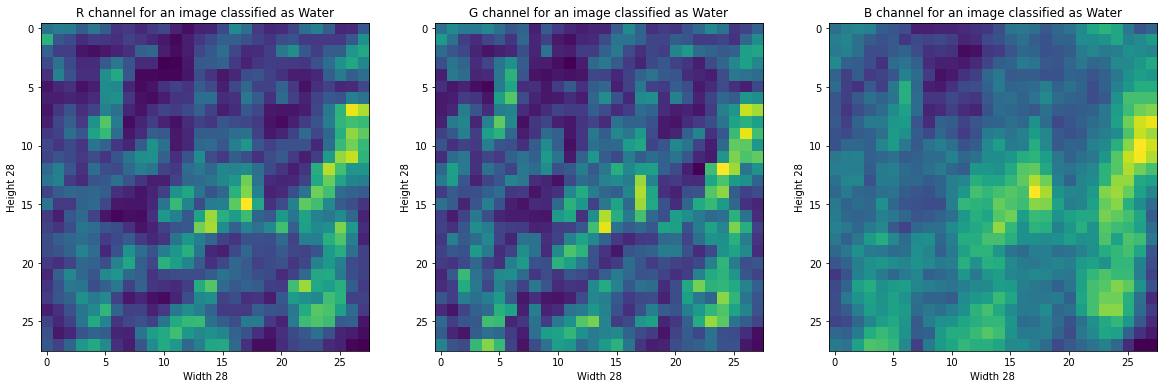

In [ ]:
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[100, : , : , 0])
ax[0].set_title('R channel for an image classified as Water')
ax[0].set_ylabel('Height {}'.format(Xtrain[100].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[100].shape[1]))


ax[1].imshow(Xtrain[100, : , : , 1])
ax[1].set_title('G channel for an image classified as Water')
ax[1].set_ylabel('Height {}'.format(Xtrain[100].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[100].shape[1]))


ax[2].imshow(Xtrain[100, : , : , 2])
ax[2].set_title('B channel for an image classified as Water')
ax[2].set_ylabel('Height {}'.format(Xtrain[100].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[100].shape[1]))


plt.show()



## RGB for image classified as Tree

In [ ]:
### Get the RGB values of a sample image located at position 53. We'll plot the RGB value of a specific pixel
print('Value of only R channel {}'.format(Xtrain[53,10,10, 0]))
print('Value of only G channel {}'.format(Xtrain[53,10,10, 1]))
print('Value of only B channel {}'.format(Xtrain[53,10,10, 2]))

Value of only R channel 50
Value of only G channel 45
Value of only B channel 44


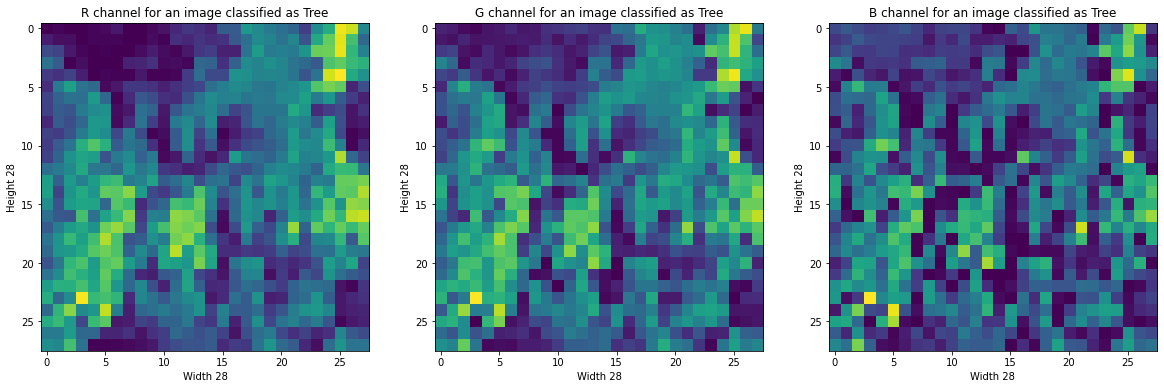

In [ ]:
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[53, : , : , 0])
ax[0].set_title('R channel for an image classified as Tree')
ax[0].set_ylabel('Height {}'.format(Xtrain[53].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[53].shape[1]))


ax[1].imshow(Xtrain[53, : , : , 1])
ax[1].set_title('G channel for an image classified as Tree')
ax[1].set_ylabel('Height {}'.format(Xtrain[53].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[53].shape[1]))


ax[2].imshow(Xtrain[53, : , : , 2])
ax[2].set_title('B channel for an image classified as Tree')
ax[2].set_ylabel('Height {}'.format(Xtrain[53].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[53].shape[1]))


plt.show()


## RGB for image classified as grassland

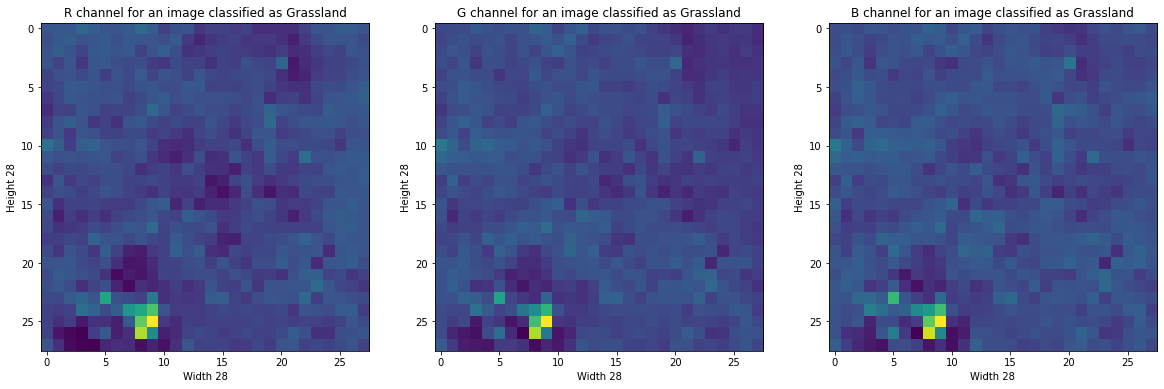

In [ ]:
## RGB Value for Grassland: 
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[29, : , : , 0])
ax[0].set_title('R channel for an image classified as Grassland')
ax[0].set_ylabel('Height {}'.format(Xtrain[29].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[29].shape[1]))


ax[1].imshow(Xtrain[29, : , : , 1])
ax[1].set_title('G channel for an image classified as Grassland')
ax[1].set_ylabel('Height {}'.format(Xtrain[29].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[29].shape[1]))


ax[2].imshow(Xtrain[29, : , : , 2])
ax[2].set_title('B channel for an image classified as Grassland')
ax[2].set_ylabel('Height {}'.format(Xtrain[29].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[29].shape[1]))


plt.show()


## RGB for image classified as barren land

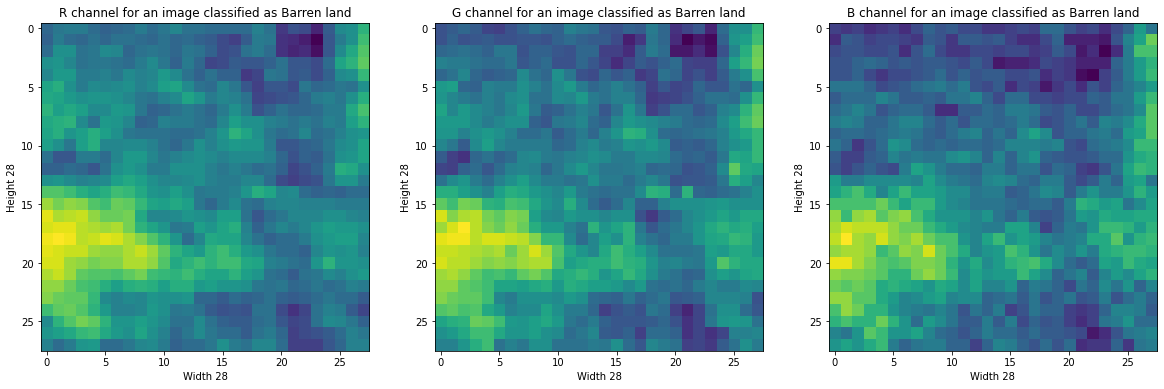

In [ ]:
## RGB Value for Barren Land: 
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[1, : , : , 0])
ax[0].set_title('R channel for an image classified as Barren land')
ax[0].set_ylabel('Height {}'.format(Xtrain[1].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[1].shape[1]))


ax[1].imshow(Xtrain[1, : , : , 1])
ax[1].set_title('G channel for an image classified as Barren land')
ax[1].set_ylabel('Height {}'.format(Xtrain[1].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[1].shape[1]))


ax[2].imshow(Xtrain[1, : , : , 2])
ax[2].set_title('B channel for an image classified as Barren land')
ax[2].set_ylabel('Height {}'.format(Xtrain[1].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[1].shape[1]))


plt.show()


## RGB for image classified as building

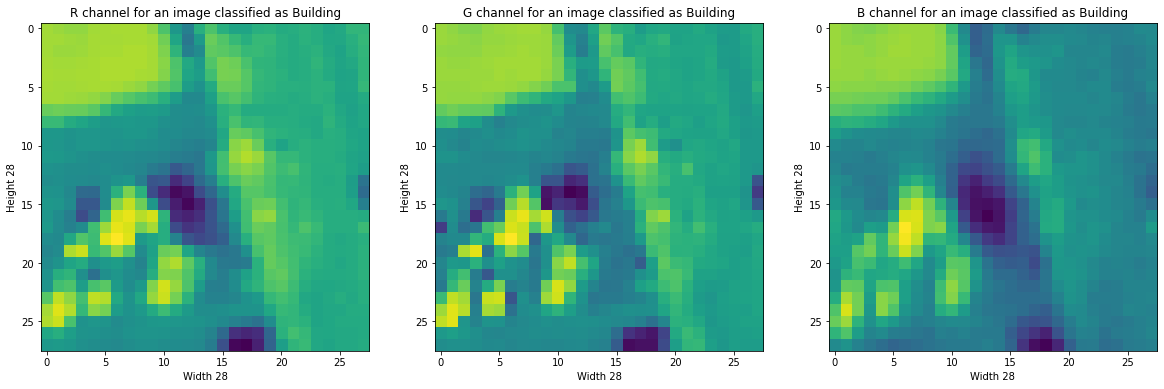

In [ ]:
## RGB Value for Barren Land: 
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[81, : , : , 0])
ax[0].set_title('R channel for an image classified as Building')
ax[0].set_ylabel('Height {}'.format(Xtrain[81].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[81].shape[1]))


ax[1].imshow(Xtrain[81, : , : , 1])
ax[1].set_title('G channel for an image classified as Building')
ax[1].set_ylabel('Height {}'.format(Xtrain[81].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[81].shape[1]))


ax[2].imshow(Xtrain[81, : , : , 2])
ax[2].set_title('B channel for an image classified as Building')
ax[2].set_ylabel('Height {}'.format(Xtrain[81].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[81].shape[1]))


plt.show()


## RGB for image classified as road

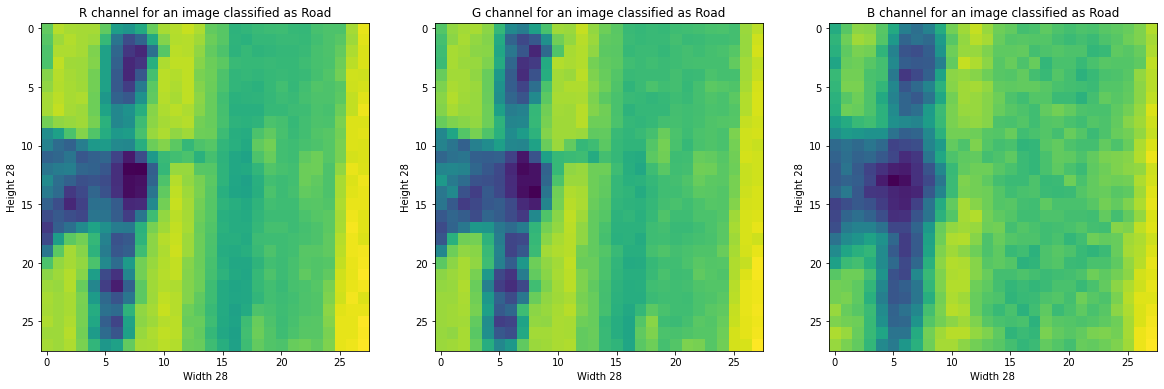

In [ ]:
## RGB Value for Barren Land: 
fig,ax =plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(Xtrain[131, : , : , 0])
ax[0].set_title('R channel for an image classified as Road')
ax[0].set_ylabel('Height {}'.format(Xtrain[131].shape[0]))
ax[0].set_xlabel('Width {}'.format(Xtrain[131].shape[1]))


ax[1].imshow(Xtrain[131, : , : , 1])
ax[1].set_title('G channel for an image classified as Road')
ax[1].set_ylabel('Height {}'.format(Xtrain[131].shape[0]))
ax[1].set_xlabel('Width {}'.format(Xtrain[131].shape[1]))


ax[2].imshow(Xtrain[131, : , : , 2])
ax[2].set_title('B channel for an image classified as Road')
ax[2].set_ylabel('Height {}'.format(Xtrain[131].shape[0]))
ax[2].set_xlabel('Width {}'.format(Xtrain[131].shape[1]))


plt.show()


### Determining Average Image by Classtype


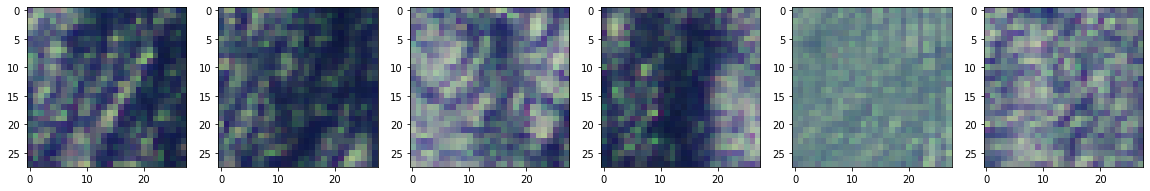

In [ ]:
#Plot some sample figures for exploration
fig,ax =plt.subplots(1,6,figsize=(20,10))
ax[0].imshow(water_images[1], cmap='gray', vmin = 0, vmax = 255)
ax[1].imshow(water_images[29])
ax[2].imshow(water_images[53])
ax[3].imshow(water_images[7])
ax[4].imshow(water_images[81])
ax[5].imshow(water_images[258])
# ax[0].set_title(ytrain_cat[1])
# ax[1].set_title(ytrain_cat[29])
# ax[2].set_title(ytrain_cat[53])
# ax[3].set_title(ytrain_cat[287])
# ax[4].set_title(ytrain_cat[81])
# ax[5].set_title(ytrain_cat[131]);

In [ ]:
def getAverageRGBN(image):
  """
  Given PIL Image, return average value of color as (r, g, b)
  """
  # get image as numpy array
  im = np.array(image)
  # get shape
  w,h,d = im.shape
  # change shape
  im.shape = (w*h, d)
  # get average
  return tuple(np.average(im, axis=0))

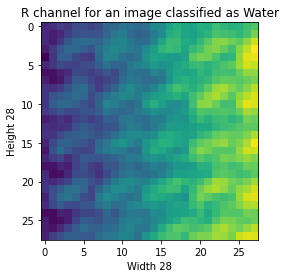

In [ ]:
plt.title('R channel for an image classified as Water')
plt.ylabel('Height {}'.format(water_r_mean.shape[0]))
plt.xlabel('Width {}'.format(water_r_mean.shape[1]))

plt.imshow(water_r_mean)
plt.show()

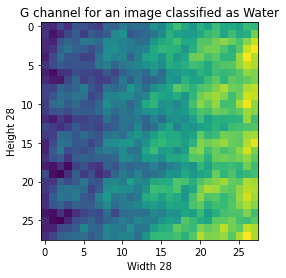

In [ ]:
plt.title('G channel for an image classified as Water')
plt.ylabel('Height {}'.format(water_g_mean.shape[0]))
plt.xlabel('Width {}'.format(water_g_mean.shape[1]))

plt.imshow(water_g_mean)
plt.show()

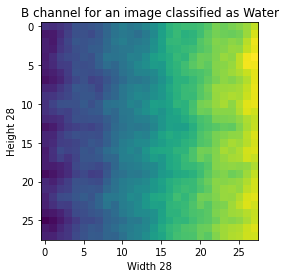

In [ ]:
plt.title('B channel for an image classified as Water')
plt.ylabel('Height {}'.format(water_b_mean.shape[0]))
plt.xlabel('Width {}'.format(water_b_mean.shape[1]))

plt.imshow(water_b_mean)
plt.show()

### Lumens (Gray scale)


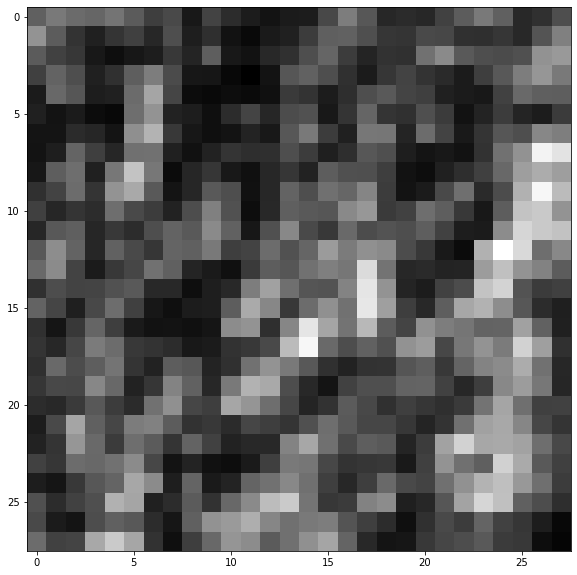

Maximum RGB value in this image 174.99999999999997
Minimum RGB value in this image 24.52
Random indexes [X,Y] : 81.38


In [ ]:
## Lumen for Water
gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 
gray_water = gray(Xtrain[100])




plt.figure( figsize = (10,10))
plt.imshow(gray_water, cmap = plt.get_cmap(name = 'gray'))
plt.show()
print('Maximum RGB value in this image {}'.format(gray_water.max()))
print('Minimum RGB value in this image {}'.format(gray_water.min()))
print('Random indexes [X,Y] : {}'.format(gray_water[25, 25]))

In [ ]:
#Average RGB value of all images classified as barren
barren_df = ytrain_cat_df.loc[ytrain_cat_df['Category'] == 'barren land']
barren_df.reset_index(inplace=True)



barren_r = []
barren_g = []
barren_b = []
for i in barren_df['index']:
  barren_r.append(Xtrain[i,:,:,0])
  barren_g.append(Xtrain[i,:,:,1])
  barren_b.append(Xtrain[i,:,:,2])


barren_r_mean = np.mean(barren_r, axis = 0)
barren_g_mean = np.mean(barren_g, axis = 0)
barren_b_mean = np.mean(barren_b, axis = 0)

In [ ]:
barren_r_mean

array([[173.20639808, 173.28824066, 173.25397496, 173.28983473,
        173.31517637, 173.25438369, 173.23582708, 173.32138916,
        173.24686295, 173.28877202, 173.31743804, 173.27144161,
        173.27209559, 173.30528496, 173.2638255 , 173.28728695,
        173.3194681 , 173.25234001, 173.23778901, 173.31023066,
        173.26495633, 173.30445386, 173.29493031, 173.23209395,
        173.22006349, 173.24731256, 173.21289698, 173.24420617],
       [173.2183468 , 173.25957464, 173.30645667, 173.30321403,
        173.29873156, 173.29227353, 173.26452035, 173.27908498,
        173.30820061, 173.30478085, 173.27397578, 173.3075875 ,
        173.32186602, 173.28825429, 173.3188005 , 173.31694756,
        173.3053667 , 173.32832405, 173.28502527, 173.28155102,
        173.32156628, 173.33393735, 173.29927654, 173.28824066,
        173.26126408, 173.24323882, 173.28616973, 173.28197338],
       [173.26689102, 173.27535185, 173.33038135, 173.34426475,
        173.32333747, 173.36572339, 17

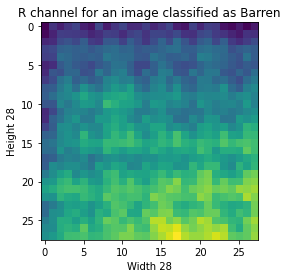

In [ ]:
plt.title('R channel for an image classified as Barren')
plt.ylabel('Height {}'.format(barren_r_mean.shape[0]))
plt.xlabel('Width {}'.format(barren_r_mean.shape[1]))

plt.imshow(barren_r_mean)
plt.show()

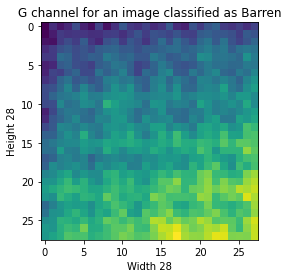

In [ ]:
plt.title('G channel for an image classified as Barren')
plt.ylabel('Height {}'.format(barren_g_mean.shape[0]))
plt.xlabel('Width {}'.format(barren_g_mean.shape[1]))

plt.imshow(barren_g_mean)
plt.show()

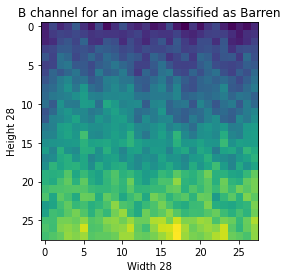

In [ ]:
plt.title('B channel for an image classified as Barren')
plt.ylabel('Height {}'.format(barren_b_mean.shape[0]))
plt.xlabel('Width {}'.format(barren_b_mean.shape[1]))

plt.imshow(barren_b_mean)
plt.show()

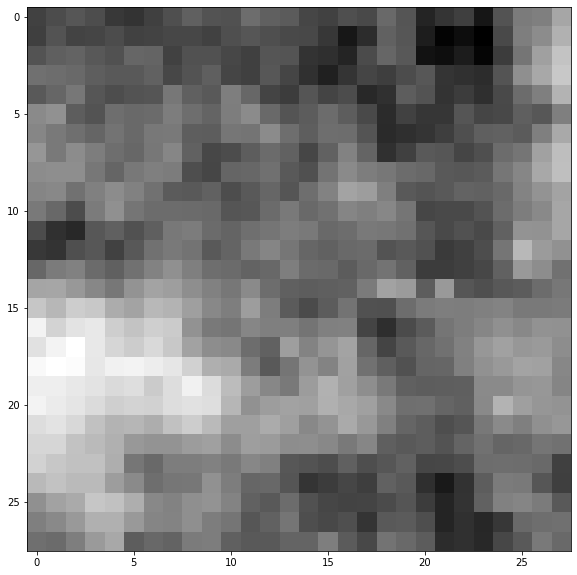

Maximum RGB value in this image 189.39999999999998
Minimum RGB value in this image 144.07999999999998
Random indexes [X,Y] : 167.67999999999998


In [ ]:
## Lumen for Barren Land
gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 
gray_barren = gray(Xtrain[1])

plt.figure( figsize = (10,10))
plt.imshow(gray_barren, cmap = plt.get_cmap(name = 'gray'))
plt.show()
print('Maximum RGB value in this image {}'.format(gray_barren.max()))
print('Minimum RGB value in this image {}'.format(gray_barren.min()))
print('Random indexes [X,Y] : {}'.format(gray_barren[25, 25]))

In [ ]:
Xtrain[100,:,:,:]

array([[[ 70,  83,  93,  12],
        [ 78, 101,  97,  13],
        [ 77,  90,  99,  13],
        ...,
        [ 32,  49,  95,   7],
        [ 34,  56,  86,   7],
        [ 56,  73,  90,  10]],

       [[109, 113,  97,  15],
        [ 55,  84,  99,  11],
        [ 49,  53,  93,   9],
        ...,
        [ 40,  46,  98,   8],
        [ 56,  77, 100,  10],
        [ 89, 103, 105,  14]],

       [[ 62,  81,  96,  12],
        [ 43,  66,  98,   9],
        [ 43,  58,  93,   8],
        ...,
        [ 59,  73, 102,  11],
        [ 92, 117, 101,  16],
        [103, 120,  99,  18]],

       ...,

       [[ 45,  79,  82,   8],
        [ 33,  53,  83,   7],
        [ 45,  66,  91,   8],
        ...,
        [ 58,  86, 104,  15],
        [ 61,  71,  87,  10],
        [ 25,  57,  76,   7]],

       [[ 52,  71,  91,   9],
        [ 26,  40,  89,   7],
        [ 32,  32,  96,   7],
        ...,
        [ 31,  61,  89,   8],
        [ 27,  43,  78,   6],
        [ 21,  28,  73,   4]],

       [[ 56

In [ ]:
## Reading the training and test csv files will crash the Google Colab kernel since the RAM availability is not enough. Instead, we'll try to load the image in batches

#Define batch size
batch_size = 64

#Define size of image (28 by 28 pixel by 4 bands)
img_shape = 28, 28, 4


# Define a variable for number of training and test images
num_train_images, num_test_images = 324000, 81000  # from the dataset site
train_steps, test_steps = num_train_images // batch_size, num_test_images // batch_size

In [ ]:
#Create a function to read the csv file in batches. This function returns a data generator. Every time the generator is called it yields one batch of pairs (images, labels).
def get_gen(x_csv_path, y_csv_path, batch_size=batch_size,
            img_shape=img_shape, labels_num=6, augment=False):
  
  xf, yf = open(x_csv_path), open(y_csv_path)
  x_reader, y_reader = csv.reader(xf, delimiter=","), csv.reader(yf, delimiter=",")

  while True:
    imgs = np.zeros((batch_size, *img_shape))
    labels = np.zeros((batch_size, labels_num))

    for i in range(batch_size):

      try:
        x_line, y_line = next(x_reader), next(y_reader)
      except:
        # this except clause resets the line readers when they reach the end of the files
        xf.close()
        yf.close()
        xf, yf = open(x_csv_path), open(y_csv_path)
        x_reader, y_reader = csv.reader(xf, delimiter=","), csv.reader(yf, delimiter=",")
        x_line, y_line = next(x_reader), next(y_reader)

      img = np.reshape(list(map(int, x_line)), img_shape)
      img = img/255.0
      imgs[i] = img

      label = np.array(list(map(int, y_line)))
      labels[i] = label

    yield imgs, labels


In [ ]:
#Create a function to plot images and labels in batches

def plot_images(images, labels=None, preds=None):
  """
  Plot a batch of images and labels.
  
  This function plots a sample of images from the dataset along with their labels as image header.
  If preds is given the header is real label/predicted label.
  """
  #Set number of columns for image 
  imgcols = 8
  labels = np.argmax(labels, -1) if labels is not None else labels
  r = int(len(images) / imgcols)
  if preds is not None: 
    preds = np.argmax(preds, -1)
  fig, ax = plt.subplots(r, imgcols, figsize=(16, 16))
  cnt = 0
  for i in range(r):
    for j in range(imgcols):
      ax[i, j].imshow(images[cnt, ..., :3], cmap='gray')
      ax[i, j].axis('off')
      if labels is not None:
        title = label_names[labels[cnt]] if preds is None else '%s/%s' % (label_names[labels[cnt]],
                                                                        label_names[preds[cnt]])
        ax[i, j].set_title(title, fontsize=12 if preds is None else 8)
      cnt += 1
  plt.show()

In [ ]:
train_gen = get_gen('X_train_sat6.csv', 'y_train_sat6.csv')
test_gen = get_gen('X_test_sat6.csv', 'y_test_sat6.csv')

label_names = list(pd.read_csv('sat6annotations.csv', header=None)[0])
print('label names:\n%s' % ', '.join(label_names))

label names:
building, barren_land, trees, grassland, road, water


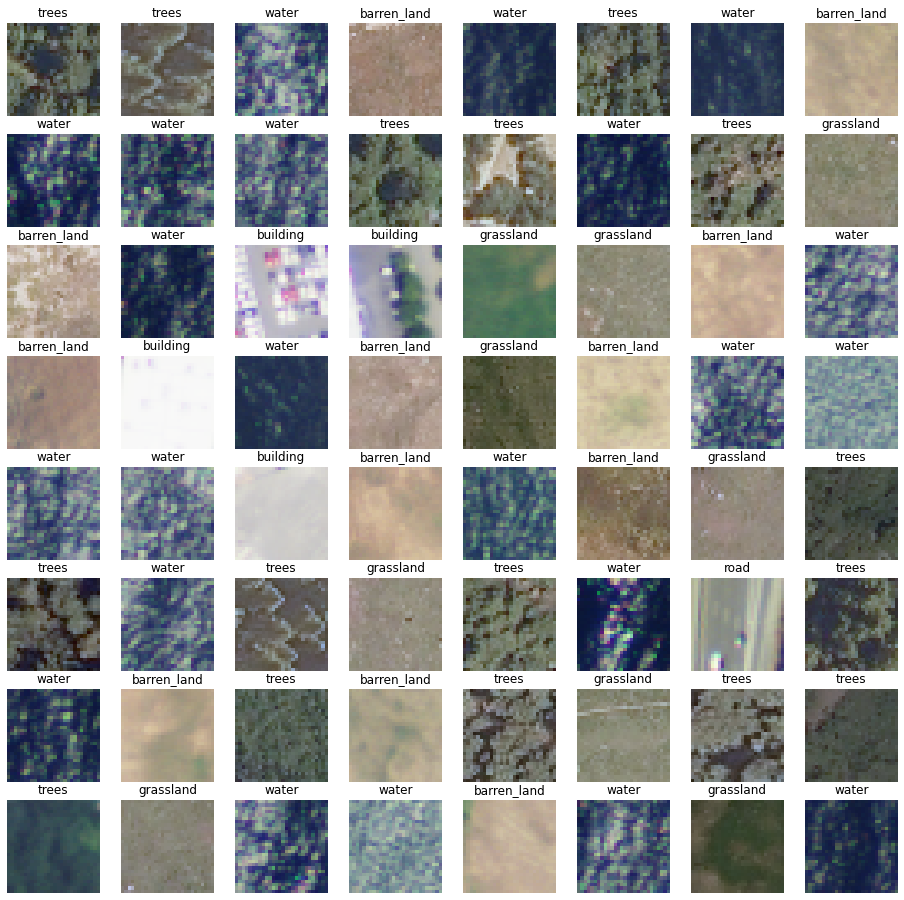

In [ ]:
imgs, labels = next(test_gen)
plot_images(imgs, labels)

In [ ]:
imgs[0].shape

(28, 28, 4)

In [ ]:
## Function to read test and training data
X_df = []
def read_data_and_labels(data, label):
  chunksize = 20
  for chunk in pd.read_csv(data, header = None, chunksize = chunksize):
    X_df.append(chunk)
  #data_df = pd.read_csv(data, header = None)
  #X_df = data_df.values.reshape(len(data_df), 28, 28, 4).clip(0,255).astype(np.uint8)
  label_df = pd.read_csv(label, header=None)
  y_df = label_df.values.astype(np.int8)

  return X_df, y_df

In [ ]:
X_train, y_train = read_data_and_labels(data = 'X_train_sat6.csv', label = 'y_train_sat6.csv')

In [ ]:
ls

'Colab Notebooks'/                        sat-6-full.mat     y_test_sat6.csv
 DeepSat6-ExploratoryDataAnalysis.ipynb   X_test_sat6.csv    y_train_sat6.csv
 sat6annotations.csv                      X_train_sat6.csv


In [ ]:
test_X = data_test_x.values.reshape((len(data_test_x),28,28,4)).clip(0,255).astype(np.uint8)

In [ ]:
len(data_test_x.values)

81000

In [ ]:
print(test_X[0][0][0])

[ 95  91  61 157]


In [ ]:
test_X.shape

(81000, 28, 28, 4)

In [ ]:
test_Y = pd.read_csv("y_test_sat6.csv")

In [ ]:
test_Y = test_Y.values.astype(np.uint8)

In [ ]:
test_Y.head()

,0,0.1,1,0.2,0.3,0.4
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [ ]:
Y = test_Y.values.getfield(dtype = (np.int8))

In [ ]:
chunksize = 1000
X_train = pd.DataFrame([])
for chunk in pd.read_csv('X_train_sat6.csv', header = None, chunksize = chunksize, iterator=True):
  X_train = X_train.append(chunk)

KeyboardInterrupt: ignored

In [ ]:
test_X = pd.read_csv("X_test_sat6.csv")

In [ ]:
test_X.head()

,95,91,61,157,105,113,101,179,50,35,24,124,117,129,127,188,95.1,105.1,94,161,45,39,24.1,110,65,71,81,115,51,56,66,94.1,52,59,65.1,84,49,50.1,58,90,...,61.32,56.34,34.3,102.27,95.29,106.25,97.28,145.7,93.51,102.28,75.25,150.4,121.17,137.13,124.15,196.1,114.29,131.18,113.48,196.2,82.20,90.28,55.11,164.4,90.29,101.35,69.42,166.2,107.38,122.13,107.39,181.10,118.21,137.14,127.17,205,90.30,105.58,86.25,183.12
0,102,102,103,137,108,110,116,154,88,83,70,122,81,69,53,103,96,92,85,140,134,142,150,205,110,111,106,174,104,97,85,155,104,98,85,154,99,95,81,148,...,113,110,93,168,115,114,95,171,115,115,96,177,125,127,113,195,126,130,119,199,127,131,124,199,124,126,120,191,101,99,91,157,95,92,84,143,89,85,76,130
1,47,54,95,10,79,89,108,15,96,131,118,23,96,130,124,24,74,96,124,17,78,82,122,19,123,128,139,34,145,163,154,49,139,153,159,49,136,143,159,42,...,154,148,155,60,97,103,130,26,70,63,121,15,81,86,127,17,76,81,126,15,50,48,105,10,51,56,107,11,69,100,118,17,82,98,125,18,61,69,113,13
2,200,181,178,218,192,177,176,214,162,141,125,196,157,132,112,192,161,138,122,195,197,183,180,211,216,205,200,220,219,208,202,222,212,200,189,216,207,193,180,213,...,148,125,107,187,139,118,93,182,155,139,117,196,159,141,124,197,165,142,129,201,145,121,102,188,155,138,118,194,168,152,139,203,157,138,125,193,147,128,107,187
3,85,101,100,15,87,102,97,16,54,71,88,10,29,34,78,7,42,55,75,8,51,79,76,8,41,56,76,7,31,37,75,6,30,51,74,6,30,44,71,5,...,34,46,71,6,26,38,72,5,24,34,68,5,24,37,66,5,31,44,70,6,49,73,77,8,54,82,79,9,50,54,74,8,37,49,76,6,27,43,69,6
4,49,54,71,69,53,63,72,80,41,43,43,73,63,70,77,97,74,81,85,112,87,97,99,129,80,84,82,115,95,103,102,137,117,127,128,153,113,117,118,151,...,74,77,44,147,106,128,126,182,55,56,30,119,51,48,27,118,75,85,68,147,104,125,111,182,106,125,118,185,96,109,105,169,57,58,49,116,49,54,36,118


In [ ]:
import csv
from six.moves import cPickle as pickle
import numpy as np

def main(path_csv, path_pickle):

    x = []
    with open(path_csv,'r') as f:
        reader = csv.reader(f)
        for line in reader: x.append(line)

    with open(path_pickle,'w') as f:
        pickle.dump(x, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
###Ref for image generator: https://colab.research.google.com/github/Machine-Learning-Tokyo/ELSI-DL-Bootcamp/blob/master/kaggle_sat.ipynb#scrollTo=Ut-MxLKCB1o_